In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

In [ ]:
# loading IGDB dataset into pandas dataframe
igdb_data = pd.read_csv("./Data/igdb_games.csv")
igdb_data.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,category,cover,created_at,external_games,first_release_date,game_modes,genres,name,platforms,...,franchise,dlcs,standalone_expansions,remasters,bundles,ports,expanded_games,forks,expansions,remakes
0,33260,0,129073.0,1495739021,"[5526, 107828, 1927694]",1.459987e+09,[1],"[15, 32]",The Fifth Expedition,"[3, 6]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40104,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,NaN,[5],Dogou Souken,[52],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85031,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,NaN,[9],City Mysteries,[37],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,161757,1,NaN,1628007985,[2028338],NaN,NaN,NaN,Earth Defense Force: World Brothers - Riho Fut...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139538,0,117024.0,1602368467,[1966278],1.525910e+09,[1],[32],sun machine,[82],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,33284,0,NaN,1495670400,"[5560, 1947044]",1.457741e+09,[1],[32],One way to exit,[6],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,89616,0,192106.0,1519986874,"[269608, 1949905]",NaN,[1],"[9, 33]",Bubble Whirl Shooter,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,104748,0,NaN,1530489600,"[1155919, 1972586]",NaN,NaN,NaN,Space station - build your own ISS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,146815,0,139338.0,1620325446,[2010807],1.230682e+09,[1],[9],Parking Lot Maze,[6],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,85450,0,NaN,1517356800,"[221231, 1748471, 1991656]",NaN,NaN,NaN,Transformers Prime: The Game,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# The IGDB dataset has more than 10000000 game records
igdb_data.size

10219220

In [ ]:
# Most of these games are too unsiginificant to be involved in the model, so we remove those with N/A "genres", "platforms", "involved companies" and "first_release_date".
igdb_data_clean = igdb_data.dropna(subset = ["genres", "involved_companies", "first_release_date", "platforms"])

# convert timestamp to year only
igdb_data_clean['year'] = pd.to_datetime(igdb_data_clean['first_release_date'],unit='s')
igdb_data_clean['year'] = igdb_data_clean['year'].apply(lambda x: x.year)

# new dataframe
igdb_data_clean.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,category,cover,created_at,external_games,first_release_date,game_modes,genres,name,platforms,...,dlcs,standalone_expansions,remasters,bundles,ports,expanded_games,forks,expansions,remakes,year
2,85031,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,NaN,[9],City Mysteries,[37],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
4,139538,0,117024.0,1602368467,[1966278],1.525910e+09,[1],[32],sun machine,[82],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
8,146815,0,139338.0,1620325446,[2010807],1.230682e+09,[1],[9],Parking Lot Maze,[6],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
10,135938,0,111232.0,1595440348,[1951380],1.586390e+09,[1],"[13, 32]",a sunny day in lockdown,[82],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
14,58674,0,83799.0,1504728190,"[107879, 1904687, 2220979]",1.459987e+09,NaN,"[14, 33]",PKTBALL,"[34, 39]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
18,78193,0,81698.0,1513468800,"[135902, 1186581]",1.041293e+09,[1],[10],Test Drive,"[6, 8, 11]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002
39,86080,0,86910.0,1517529600,"[102472, 1926389]",1.451520e+09,"[1, 3]",[7],SingStar: Frozen,"[9, 48]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
42,6515,0,162868.0,1398731737,"[33081, 133322, 1921436]",1.033690e+09,"[1, 2]","[10, 14]",Moto Racer Advance,[24],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002
43,7881,0,136747.0,1414221982,"[24617, 145120, 1191538]",1.090282e+09,"[1, 2, 3]","[13, 14]",ESPN NFL 2K5,"[8, 11]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
44,11226,0,10508.0,1434695086,"[1985247, 2072253]",9.598176e+08,"[1, 2]","[13, 14]",Anstoss 3,[6],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000


In [ ]:
# We are left with about 4000000 games for now
igdb_data_clean.size

3716216

# Getting data (VG Game Data) ready for ML models

In [ ]:
vg_game_data = pd.read_csv("./Data/vgchartz-7_7_2020.csv", encoding='latin1')[['title', 'console', 'genre', 'publisher', 'developer', 'vg_score', 'critic_score', 'user_score', 'release_date', 'total_shipped/sales']]
vg_game_data['log2'] = vg_game_data['total_shipped/sales'].apply(lambda x: math.log2(x+.0001))
vg_game_data = vg_game_data.dropna(subset = ["release_date"])

vg_game_data['year'] = vg_game_data['release_date'].str[-4:]
vg_game_data = vg_game_data.sort_values(by=['total_shipped/sales'],ascending=False).reset_index()
vg_game_data.head(10)

FileNotFoundError: ignored

In [ ]:
vg_game_data['publisher'].replace(list(vg_game_data.publisher.unique()), list(range(vg_game_data.publisher.unique().size)), inplace=True)
vg_game_data['genre'].replace(list(vg_game_data.genre.unique()), list(range(vg_game_data.genre.unique().size)), inplace=True)
vg_game_data['console'].replace(list(vg_game_data.console.unique()), list(range(vg_game_data.console.unique().size)), inplace=True)

In [ ]:
vg_game_data.head(10)

,index,title,console,genre,publisher,developer,vg_score,critic_score,user_score,release_date,total_shipped/sales,log2,year
0,36179,Pokemon,0,0,0,Game Freak,NaN,NaN,NaN,9/28/1998,365.60,8.518063,1998
1,26186,Super Mario,0,1,0,Nintendo,NaN,NaN,NaN,7/20/1983,356.59,8.482163,1983
2,13391,Grand Theft Auto,0,2,1,Rockstar North|Rockstar Leeds|Digital Eclipse,NaN,NaN,NaN,3/27/1998,310.00,8.280771,1998
3,41087,Call of Duty,0,3,2,Infinity Ward|Grey Matter Interactive|Treyarch...,NaN,NaN,NaN,10/29/2003,300.00,8.233620,2003
4,48765,FIFA,0,4,3,Extended Play Productions (1991-1997)|EA Vanco...,NaN,NaN,NaN,12/15/1993,282.40,8.146696,1993
5,41069,Minecraft,0,5,4,Mojang,NaN,NaN,NaN,11/18/2011,200.00,7.651052,2011
6,45910,The Sims,0,6,5,Maxis,NaN,NaN,NaN,2/4/2000,200.00,7.651052,2000
7,29781,Tetris,0,7,6,Alexey Pajitnov|AcademySoft|Andromeda Software...,NaN,NaN,NaN,6/6/1984,171.00,7.426265,1984
8,36180,Final Fantasy,0,0,7,Square|Square Enix,NaN,NaN,NaN,12/18/1987,152.50,7.262095,1987
9,33053,Need for Speed,0,8,5,EA Black Box|EA Bright Light|EA Canada|Eden St...,NaN,NaN,NaN,8/31/1994,150.00,7.238405,1994


# Model trainging using VG Game data

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

In [ ]:
# X = vg_game_data[['console','genre','publisher','year']]
# y = vg_game_data['log2']
# len(X.index)

54280

## Split training and testing data set from the table (change to K-fold later)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Random Forest Regression

In [ ]:
# regr = RandomForestRegressor(max_depth=20, max_leaf_nodes=100, random_state=0)

In [ ]:
# regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_leaf_nodes=100, random_state=0)

## Model performance

In [ ]:
# regr.score(X_test, y_test)

0.49015213316894923

In [ ]:
# y_pred = regr.predict(X_test)
# y_test_arr = np.array(y_test)

## Visualization of the model's performance (400 test points)

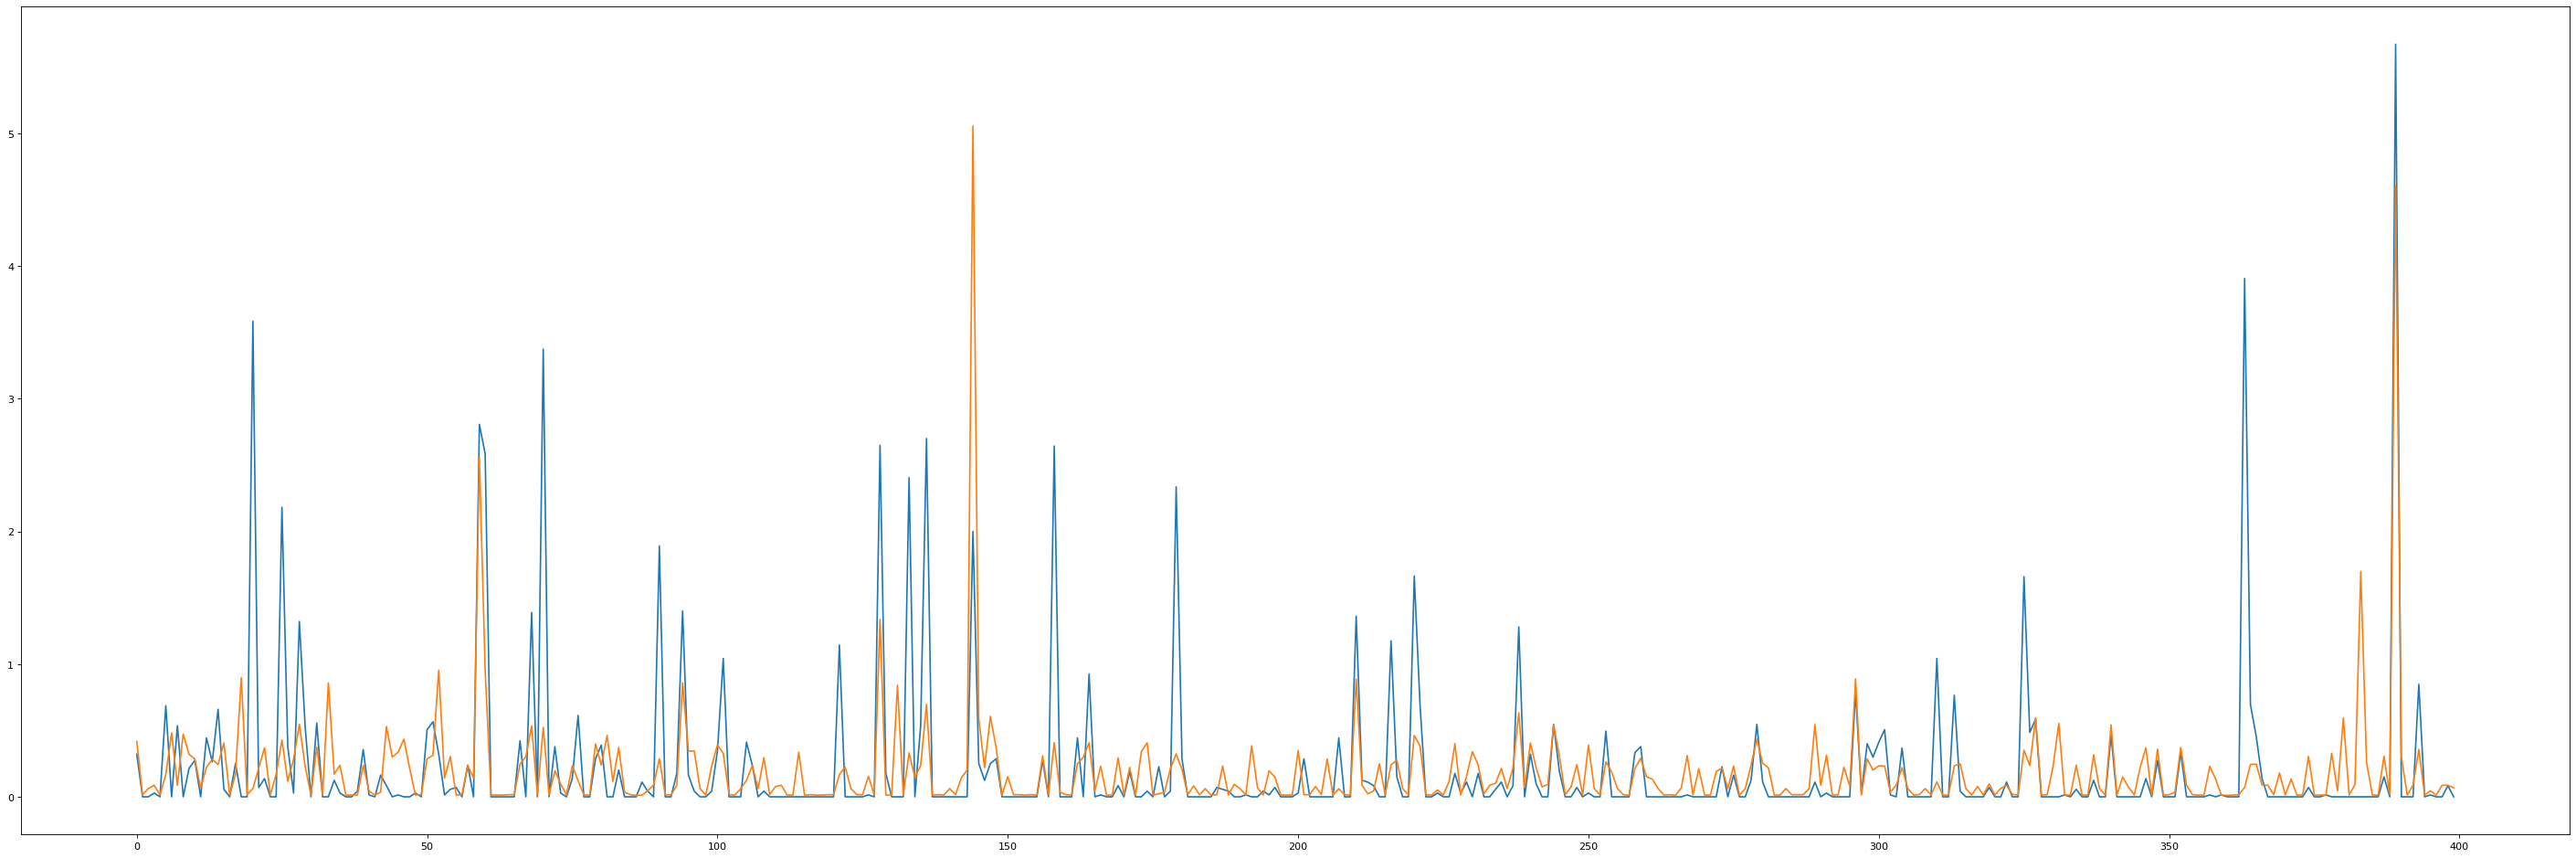

In [ ]:
# plt.figure(figsize=(45, 15), dpi=80)
# plt.plot(y_test_arr[1000:1400])
# plt.plot(y_pred[1000:1400])
# plt.show()

In [ ]:
combined_data_jacob = pd.read_csv("./Data/combined_igdb_vgchartz - combined_igdb_vgchartz.csv", encoding='latin-1')

In [ ]:
combined_data_jacob

,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,total_sales_shipped,id,category,cover,created_at,external_games,first_release_date,game_modes,genres,name,platforms,release_dates,screenshots,similar_games,slug,status,summary,tags,themes,updated_at,url,websites,checksum,age_ratings,involved_companies,alternative_names,parent_game,game_engines,keywords,player_perspectives,artworks,videos,collection,storyline,rating,rating_count,total_rating,total_rating_count,version_parent,version_title,hypes,franchises,follows,aggregated_rating,aggregated_rating_count,multiplayer_modes,franchise,dlcs,standalone_expansions,remasters,bundles,ports,expanded_games,forks,expansions,remakes
0,/games/boxart/full_5617044AmericaFrontccc.jpg,Air-Sea Battle,2600,Shooter,Atari,Atari,NaN,NaN,NaN,NaN,0.98,0.91,NaN,0.06,0.01,1977-01-01,NaN,0.98,11859,0,142674.0,1441011393,"[152149, 1867352]",242784000,"[1, 2]",[5],Air-Sea Battle,[59],"[45423, 45424, 251759]","[486042, 486043, 486044, 486045, 486046, 48604...","[8422, 38030, 68286, 68287, 102868, 103292, 10...",air-sea-battle,NaN,There are six basic types of game available in...,"[1, 39, 268435461, 536870933, 536871038, 53687...","[1, 39]",1644592860,https://www.igdb.com/games/air-sea-battle,[20482],f3062b5b-7083-a8c9-189f-b050cade184e,NaN,[31577],"[64911, 64912, 64913, 64914]",NaN,NaN,"[21, 126, 1025, 2585, 2841, 4523, 5362, 6078]",[4],"[11531, 11532, 11533]","[13141, 27502]",NaN,NaN,56.542922,6.0,56.542922,6.0,NaN,NaN,NaN,[1951],1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2641, 18437, 24891, 34518, 78985, 113382, 130...",[68560],NaN,NaN,NaN,NaN
1,/games/boxart/1922831ccc.jpg,Indy 500,2600,Racing,Atari,Atari,NaN,NaN,NaN,NaN,0.27,0.26,NaN,0.01,0.00,1977-10-01,NaN,0.27,54790,0,29401.0,1503135222,[138918],252374400,"[1, 2]","[10, 30]",Indy 500,[59],"[162866, 162867]",[269620],"[3772, 27378, 44178, 57187, 64998, 67432, 7133...",indy-500--1,NaN,Indy 500 is a 1977 racing video game developed...,"[1, 268435466, 268435486, 536871846, 536875069...",[1],1633174433,https://www.igdb.com/games/indy-500--1,[95894],155a5328-742b-9f30-3a93-ca323e75202c,NaN,[98026],[75155],NaN,NaN,"[934, 4157, 4216, 4346, 4499, 4500, 4504, 4523...",[3],NaN,[15441],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[9155],NaN,NaN,NaN,NaN,"[24962, 40611, 113382]",NaN,NaN,NaN,NaN,NaN
2,/games/boxart/341355ccc.jpg,Flag Capture,2600,Action,Atari,Atari,NaN,NaN,NaN,NaN,0.27,0.25,NaN,0.02,0.00,1978-01-01,NaN,0.27,17024,0,14045.0,1454284800,"[21035, 144290, 1873011]",283910400,"[1, 2]","[9, 15]",Flag Capture,[59],[125336],NaN,"[17613, 26574, 27092, 34024, 36346, 55036, 569...",flag-capture,NaN,Flag Capture was one of the eleven Atari 2600 ...,"[1, 268435465, 268435471, 536874694]",[1],1603238400,https://www.igdb.com/games/flag-capture,NaN,111b61ac-5f9e-8de9-8af3-65a77f65204d,NaN,[56662],[6041],NaN,NaN,[3782],[3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2641, 18437, 34518]",NaN,NaN,NaN,NaN,NaN
3,/games/boxart/752510ccc.jpg,Home Run,2600,Sports,Atari,Atari,NaN,NaN,NaN,NaN,0.15,0.14,NaN,0.01,0.00,1978-01-01,NaN,0.15,18414,0,14701.0,1458259200,NaN,283910400,NaN,[14],Home Run,[59],[48495],NaN,"[14733, 109606, 116343, 116349, 116350, 116351...",home-run,NaN,This is the first of three iterations of baseb...,[268435470],NaN,1591920000,https://www.igdb.com/games/home-run,NaN,9a9d91aa-15c5-dce3-e771-3a3d20fbf678,NaN,[33916],NaN,NaN,NaN,NaN,NaN,NaN,[15451],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[2641, 18437]",NaN,NaN,NaN,NaN,NaN
4,/games/boxart/2979155ccc.jpg,Circus Atari,2600,Action,Atari,Atari,NaN,NaN,NaN,NaN,0.46,0.43,NaN,0.03,0.00,1978-01-01,NaN,0.46,5667,0,179337.0,1396150887,[136465],315446400,[1],"[13, 30, 33]",Circus Atari,"[39, 59, 138, 139]","[45428, 114455, 114456, 122352]",[125977],"[17130, 17548, 19164, 20329, 29348, 35371, 361...",circus-atari--1,NaN,3 rows of tria

In [ ]:
combined_data_jacob.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'vg_score', 'critic_score', 'user_score', 'total_shipped',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update', 'total_sales_shipped', 'id', 'category',
       'cover', 'created_at', 'external_games', 'first_release_date',
       'game_modes', 'genres', 'name', 'platforms', 'release_dates',
       'screenshots', 'similar_games', 'slug', 'status', 'summary', 'tags',
       'themes', 'updated_at', 'url', 'websites', 'checksum', 'age_ratings',
       'involved_companies', 'alternative_names', 'parent_game',
       'game_engines', 'keywords', 'player_perspectives', 'artworks', 'videos',
       'collection', 'storyline', 'rating', 'rating_count', 'total_rating',
       'total_rating_count', 'version_parent', 'version_title', 'hypes',
       'franchises', 'follows', 'aggregated_rating', 'aggregated_rating_count',
       'multiplayer_modes', 'franchise', 'dlcs

In [ ]:
combined_data_jacob_dropped = combined_data_jacob.drop(['img', 'bundles', 'expanded_games', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales','last_update','cover', 'created_at', 'external_games', 'first_release_date','name','release_dates',
       'screenshots', 'similar_games', 'slug','updated_at', 'url', 'websites', 'checksum','involved_companies', 'alternative_names', 'parent_game','artworks', 'videos','version_parent', 'version_title','follows','ports','forks',
       'expansions', 'remakes'], axis=1)

In [ ]:
combined_data_jacob_dropped = combined_data_jacob_dropped[combined_data_jacob_dropped['release_date']>'2007-01-01']

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
combined_data_jacob_dropped

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,release_date,total_sales_shipped,id,category,game_modes,genres,platforms,status,summary,tags,themes,age_ratings,game_engines,keywords,player_perspectives,collection,storyline,rating,rating_count,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,multiplayer_modes,franchise,dlcs,standalone_expansions,remasters
1781,WarioWare: Smooth Moves,Wii,Puzzle,Nintendo,Intelligent Systems,8.1,8.2,NaN,2.35,2007-01-15,2.35,1706,0,"[1, 2, 4]",[9],"[5, 41]",NaN,"Wario and his pals learn fun, wacky moves afte...","[1, 27, 268435465, 536870915, 536871186, 53687...","[1, 27, 40]","[211, 50844, 50845, 50846, 50847]",NaN,"[3, 274, 350, 403, 758, 1299, 1699, 1935, 2152...","[1, 2, 4]",1113.0,NaN,86.193063,55.0,83.096531,57.0,NaN,"[24, 1752]",80.0,2.0,NaN,24.0,NaN,NaN,NaN
1782,World of Warcraft: The Burning Crusade,PC,MMO,Blizzard Entertainment,Blizzard Entertainment,NaN,9.2,NaN,3.50,2007-01-16,3.50,227,2,[5],[12],"[6, 14]",NaN,"World of Warcraft: The Burning Crusade, the fi...","[17, 268435468, 536870928, 536870984, 53687100...",[17],"[1049, 45013]",NaN,"[16, 72, 96, 129, 159, 170, 221, 226, 227, 236...",[2],27.0,The expansion's name refers to the return of t...,91.501369,215.0,83.250685,219.0,NaN,[135],75.0,4.0,NaN,135.0,NaN,NaN,NaN
1783,Dragon Shadow Spell,PS2,Role-Playing,Flight-Plan,Flight-Plan,NaN,NaN,NaN,NaN,2007-01-18,0.08,72814,0,NaN,"[12, 15, 16]",[8],NaN,Dragon Shadow Spell is a strategy RPG game.,"[268435468, 268435471, 268435472]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1784,Hotel Dusk: Room 215,DS,Adventure,Nintendo,Cing,NaN,8.0,6.9,NaN,2007-01-22,0.54,9249,0,[1],"[2, 9, 31, 34]",[20],NaN,Take control of an interactive mystery novel a...,"[43, 268435458, 268435465, 268435487, 26843549...",[43],"[6318, 34483]",NaN,"[16, 72, 197, 215, 274, 284, 760, 966, 1027, 1...","[1, 3, 5]",5345.0,NaN,83.467144,49.0,81.733572,51.0,NaN,NaN,80.0,2.0,NaN,NaN,NaN,NaN,NaN
1785,Europa Universalis III,PC,Strategy,Paradox Interactive,Paradox Interactive,NaN,NaN,NaN,NaN,2007-01-23,0.01,683,0,"[1, 2]","[11, 15]","[6, 14]",NaN,Europa Universalis III delves deeply into the ...,"[22, 268435467, 268435471, 536871061, 53687469...",[22],[18443],[296],"[149, 3782, 5498]",[3],165.0,NaN,84.010827,34.0,77.005413,35.0,NaN,NaN,70.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,Monark,All,Role-Playing,FuRyu Corporation,Lancarse,NaN,NaN,NaN,0.05,2022-02-22,0.05,151159,0,[1],"[12, 15, 16, 31]","[6, 48, 130, 167]",NaN,"Monark, the ânew school RPGâ from former M...","[17, 268435468, 268435471, 268435472, 26843548...",[17],"[57448, 57506]",NaN,[1270],[2],NaN,NaN,NaN,NaN,80.000000,2.0,2.0,NaN,80.0,2.0,NaN,NaN,NaN,NaN,NaN
4210,Elden Ring,All,Action-Adventure,Bandai Namco Entertainment,From Software,NaN,NaN,NaN,12.00,2022-02-25,12.00,119133,0,"[1, 2, 3]",[12],"[6, 48, 49, 167, 169]",NaN,"Elden Ring is a fantasy, action and open world...","[1, 268435468, 536888238]",[1],"[57164, 57165, 57166, 57167, 57168, 57169, 57170]",NaN,[17326],[2],NaN,NaN,95.833014,79.0,96.366507,92.0,93.0,NaN,96.9,13.0,[18291],NaN,NaN,NaN,NaN
4211,Triangle Strategy,NS,Role-Playing,Nintendo,Square Enix,7.5,NaN,NaN,0.80,2022-03-04,0.80,143610,0,[1],"[12, 15, 24, 31]",[130],NaN,Three nations battle for control of the dwindl...,"[17, 268435468, 268435471, 268435480, 268435487]",[17],"[49892, 50722, 56781]",NaN,NaN,[3],NaN,"Command a group of warriors as Serenoa, heir o...",NaN,NaN,83.000000,9.0,5.0,NaN,83.0,9.0,NaN,NaN,NaN,NaN,NaN
4212,Core Keeper,PC,Adventure,Fireshine Games,Pugstorm Game Studios,NaN,NaN,NaN,0.50,2022-03-08,0.50,152127,0,"[1, 2, 3]","[12, 31, 32]","[3, 6]",4.0,"Explore an endless cavern of creatures, relics...","[21, 33, 43, 268435468, 268435487, 268435488, ...","[21, 33, 43]",NaN,NaN,

# Getting data (combined_table) ready for ML models

Fill N/A entries with 0 (this might affect on performance - to be tested)

In [ ]:
combined_data_jacob_aggregated = combined_data_jacob.drop(['img', 'bundles', 'expanded_games', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales','last_update','cover', 'created_at', 'external_games', 'first_release_date','name','release_dates',
       'screenshots', 'similar_games', 'slug','updated_at', 'url', 'websites', 'checksum','involved_companies', 'alternative_names', 'parent_game','artworks', 'videos','version_parent', 'version_title','follows','ports','forks',
       'expansions', 'remakes', 'total_shipped', 'tags', 'multiplayer_modes', 'id'], axis=1)
combined_data_jacob_aggregated[['vg_score', 'critic_score', 'user_score', 'status', 'collection', 'rating', 'rating_count', 'total_rating', 'total_rating_count', 'aggregated_rating', 'aggregated_rating_count','total_sales_shipped','hypes']] = combined_data_jacob_aggregated[['vg_score', 'critic_score', 'user_score', 'status', 'collection', 'rating', 'rating_count', 'total_rating', 'total_rating_count', 'aggregated_rating', 'aggregated_rating_count','total_sales_shipped','hypes']].fillna(0)
combined_data_jacob_aggregated[['game_modes', 'genres', 'platforms', 'age_ratings', 'themes', 'player_perspectives']] = combined_data_jacob_aggregated[['game_modes', 'genres', 'platforms', 'age_ratings', 'themes', 'player_perspectives']].fillna('[]')
combined_data_jacob_aggregated['franchises'] = combined_data_jacob_aggregated['franchises'].isnull().astype(int)
combined_data_jacob_aggregated = combined_data_jacob_aggregated[combined_data_jacob_aggregated['release_date']>'2007-01-01'].reset_index()
combined_data_jacob_aggregated

,index,title,console,genre,publisher,developer,vg_score,critic_score,user_score,release_date,total_sales_shipped,category,game_modes,genres,platforms,status,summary,themes,age_ratings,game_engines,keywords,player_perspectives,collection,storyline,rating,rating_count,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,franchise,dlcs,standalone_expansions,remasters
0,1781,WarioWare: Smooth Moves,Wii,Puzzle,Nintendo,Intelligent Systems,8.1,8.2,0.0,2007-01-15,2.35,0,"[1, 2, 4]",[9],"[5, 41]",0.0,"Wario and his pals learn fun, wacky moves afte...","[1, 27, 40]","[211, 50844, 50845, 50846, 50847]",NaN,"[3, 274, 350, 403, 758, 1299, 1699, 1935, 2152...","[1, 2, 4]",1113.0,NaN,86.193063,55.0,83.096531,57.0,0.0,0,80.0,2.0,24.0,NaN,NaN,NaN
1,1782,World of Warcraft: The Burning Crusade,PC,MMO,Blizzard Entertainment,Blizzard Entertainment,0.0,9.2,0.0,2007-01-16,3.50,2,[5],[12],"[6, 14]",0.0,"World of Warcraft: The Burning Crusade, the fi...",[17],"[1049, 45013]",NaN,"[16, 72, 96, 129, 159, 170, 221, 226, 227, 236...",[2],27.0,The expansion's name refers to the return of t...,91.501369,215.0,83.250685,219.0,0.0,0,75.0,4.0,135.0,NaN,NaN,NaN
2,1783,Dragon Shadow Spell,PS2,Role-Playing,Flight-Plan,Flight-Plan,0.0,0.0,0.0,2007-01-18,0.08,0,[],"[12, 15, 16]",[8],0.0,Dragon Shadow Spell is a strategy RPG game.,[],[],NaN,NaN,[],0.0,NaN,0.000000,0.0,0.000000,0.0,0.0,1,0.0,0.0,NaN,NaN,NaN,NaN
3,1784,Hotel Dusk: Room 215,DS,Adventure,Nintendo,Cing,0.0,8.0,6.9,2007-01-22,0.54,0,[1],"[2, 9, 31, 34]",[20],0.0,Take control of an interactive mystery novel a...,[43],"[6318, 34483]",NaN,"[16, 72, 197, 215, 274, 284, 760, 966, 1027, 1...","[1, 3, 5]",5345.0,NaN,83.467144,49.0,81.733572,51.0,0.0,1,80.0,2.0,NaN,NaN,NaN,NaN
4,1785,Europa Universalis III,PC,Strategy,Paradox Interactive,Paradox Interactive,0.0,0.0,0.0,2007-01-23,0.01,0,"[1, 2]","[11, 15]","[6, 14]",0.0,Europa Universalis III delves deeply into the ...,[22],[18443],[296],"[149, 3782, 5498]",[3],165.0,NaN,84.010827,34.0,77.005413,35.0,0.0,1,70.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,4209,Monark,All,Role-Playing,FuRyu Corporation,Lancarse,0.0,0.0,0.0,2022-02-22,0.05,0,[1],"[12, 15, 16, 31]","[6, 48, 130, 167]",0.0,"Monark, the ânew school RPGâ from former M...",[17],"[57448, 57506]",NaN,[1270],[2],0.0,NaN,0.000000,0.0,80.000000,2.0,2.0,1,80.0,2.0,NaN,NaN,NaN,NaN
2429,4210,Elden Ring,All,Action-Adventure,Bandai Namco Entertainment,From Software,0.0,0.0,0.0,2022-02-25,12.00,0,"[1, 2, 3]",[12],"[6, 48, 49, 167, 169]",0.0,"Elden Ring is a fantasy, action and open world...",[1],"[57164, 57165, 57166, 57167, 57168, 57169, 57170]",NaN,[17326],[2],0.0,NaN,95.833014,79.0,96.366507,92.0,93.0,1,96.9,13.0,NaN,NaN,NaN,NaN
2430,4211,Triangle Strategy,NS,Role-Playing,Nintendo,Square Enix,7.5,0.0,0.0,2022-03-04,0.80,0,[1],"[12, 15, 24, 31]",[130],0.0,Three nations battle for control of the dwindl...,[17],"[49892, 50722, 56781]",NaN,NaN,[3],0.0,"Command a group of warriors as Serenoa, heir o...",0.000000,0.0,83.000000,9.0,5.0,1,83.0,9.0,NaN,NaN,NaN,NaN
2431,4212,Core Keeper,PC,Adventure,Fireshine Games,Pugstorm Game Studios,0.0,0.0,0.0,2022-03-08,0.50,0,"[1, 2, 3]","[12, 31, 32]","[3, 6]",4.0,"Explore an endless cavern of creatures, relics...","[21, 33, 43]",[],NaN,"[72, 101, 288, 510, 577, 758, 1403, 1697, 1780...",[3],0.0,"Drawn towards a mysterious relic, you are an e...",0.000000,0.0,0.000000,0.0,2.0,1,0.0,0.0,NaN,NaN,NaN,NaN


Change the total sales volume to log2 scale and aggregate it as a seperate column

In [ ]:
combined_data_jacob_aggregated['log2'] = combined_data_jacob_aggregated['total_sales_shipped'].apply(lambda x: math.log2(x+1))
combined_data_jacob_aggregated = combined_data_jacob_aggregated.drop(['total_sales_shipped'], axis=1)

Change "publisher", "developer", and "console" to categorical variables

In [ ]:
companies = list(set(combined_data_jacob_aggregated.publisher.unique()).union(set(combined_data_jacob_aggregated.developer.unique())))
combined_data_jacob_aggregated['publisher'].replace(companies, list(range(len(companies))), inplace=True)
combined_data_jacob_aggregated['developer'].replace(companies, list(range(len(companies))), inplace=True)

Split "release_date" to "year", "month", and "day"


In [ ]:
combined_data_jacob_aggregated['year'] = combined_data_jacob_aggregated['release_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").year)
combined_data_jacob_aggregated['month'] = combined_data_jacob_aggregated['release_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").month)
combined_data_jacob_aggregated['day'] = combined_data_jacob_aggregated['release_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").day)


Remove unused variables for now

In [ ]:
combined_data_jacob_cleaned = combined_data_jacob_aggregated.drop(['release_date', 'title', 'genre', 'summary', 'console', 'keywords', 'storyline', 'game_engines', 'franchise', 'standalone_expansions', 'remasters', 'dlcs'], axis=1)
combined_data_jacob_cleaned

,index,publisher,developer,vg_score,critic_score,user_score,category,game_modes,genres,platforms,status,themes,age_ratings,player_perspectives,collection,rating,rating_count,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,log2,year,month,day
0,1781,1151,829,8.1,8.2,0.0,0,"[1, 2, 4]",[9],"[5, 41]",0.0,"[1, 27, 40]","[211, 50844, 50845, 50846, 50847]","[1, 2, 4]",1113.0,86.193063,55.0,83.096531,57.0,0.0,0,80.0,2.0,1.744161,2007,1,15
1,1782,740,740,0.0,9.2,0.0,2,[5],[12],"[6, 14]",0.0,[17],"[1049, 45013]",[2],27.0,91.501369,215.0,83.250685,219.0,0.0,0,75.0,4.0,2.169925,2007,1,16
2,1783,977,977,0.0,0.0,0.0,0,[],"[12, 15, 16]",[8],0.0,[],[],[],0.0,0.000000,0.0,0.000000,0.0,0.0,1,0.0,0.0,0.111031,2007,1,18
3,1784,1151,331,0.0,8.0,6.9,0,[1],"[2, 9, 31, 34]",[20],0.0,[43],"[6318, 34483]","[1, 3, 5]",5345.0,83.467144,49.0,81.733572,51.0,0.0,1,80.0,2.0,0.622930,2007,1,22
4,1785,1037,1037,0.0,0.0,0.0,0,"[1, 2]","[11, 15]","[6, 14]",0.0,[22],[18443],[3],165.0,84.010827,34.0,77.005413,35.0,0.0,1,70.0,1.0,0.014355,2007,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,4209,1083,883,0.0,0.0,0.0,0,[1],"[12, 15, 16, 31]","[6, 48, 130, 167]",0.0,[17],"[57448, 57506]",[2],0.0,0.000000,0.0,80.000000,2.0,2.0,1,80.0,2.0,0.070389,2022,2,22
2429,4210,693,874,0.0,0.0,0.0,0,"[1, 2, 3]",[12],"[6, 48, 49, 167, 169]",0.0,[1],"[57164, 57165, 57166, 57167, 57168, 57169, 57170]",[2],0.0,95.833014,79.0,96.366507,92.0,93.0,1,96.9,13.0,3.700440,2022,2,25
2430,4211,1151,1070,7.5,0.0,0.0,0,[1],"[12, 15, 24, 31]",[130],0.0,[17],"[49892, 50722, 56781]",[3],0.0,0.000000,0.0,83.000000,9.0,5.0,1,83.0,9.0,0.847997,2022,3,4
2431,4212,529,367,0.0,0.0,0.0,0,"[1, 2, 3]","[12, 31, 32]","[3, 6]",4.0,"[21, 33, 43]",[],[3],0.0,0.000000,0.0,0.000000,0.0,2.0,1,0.0,0.0,0.584963,2022,3,8


In [ ]:
for i in range(73, 107):
  combined_data_jacob_cleaned = combined_data_jacob_cleaned.drop(["Unnamed: "+str(i)], axis=1)
combined_data_jacob_cleaned

KeyError: ignored

Flatten high dimensional columns into 1NF

In [ ]:
def getList(df, col):
  return df[col].str.strip('[]').str.split(', ').to_list()

def getUnion(df, col):
  list_form = getList(df, col)
  set_form = set()

  for i in range(len(list_form)):
    for j in range(len(list_form[i])):
      set_form.add(list_form[i][j])
  return list(set_form)

def flatten(df, col):
  entry_list = getList(df, col)
  entry_union = getUnion(df, col)

  for item in entry_union:
    df[col+" "+item] = np.zeros(df.shape[0])

  for i in range(len(entry_list)):
    for j in range(len(entry_union)):
     if entry_union[j] in entry_list[i]:
        df.at[i, col+" "+entry_union[j]] = 1

In [ ]:
flatten(combined_data_jacob_cleaned, 'genres')
flatten(combined_data_jacob_cleaned, 'platforms')
flatten(combined_data_jacob_cleaned, 'game_modes')
flatten(combined_data_jacob_cleaned, 'player_perspectives')
flatten(combined_data_jacob_cleaned, 'themes')

combined_data_jacob_cleaned = combined_data_jacob_cleaned.drop(['genres', 'platforms', 'game_modes', 'player_perspectives', 'themes'], axis = 1)

combined_data_jacob_cleaned

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


,index,publisher,developer,vg_score,critic_score,user_score,category,status,age_ratings,collection,rating,rating_count,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,log2,year,month,day,genres 24,genres 2,genres 25,genres 12,genres 7,genres 31,genres 8,genres 9,genres 16,genres 14,genres 10,genres 13,genres 36,genres 30,genres 11,genres 34,genres 15,genres 4,genres 33,genres 5,genres 35,genres 26,genres 32,platforms 44,platforms 24,platforms 35,platforms 29,platforms 93,platforms 64,platforms 130,platforms 25,platforms 163,platforms 72,platforms 12,platforms 48,platforms 52,platforms 19,platforms 20,platforms 18,platforms 170,platforms 386,platforms 7,platforms 86,platforms 167,platforms 165,platforms 8,platforms 39,platforms 58,platforms 159,platforms 113,platforms 9,platforms 73,platforms 240,platforms 14,platforms 16,platforms 161,platforms 46,platforms 38,platforms 55,platforms 42,platforms 74,platforms 169,platforms 13,platforms 132,platforms 23,platforms 41,platforms 82,platforms 11,platforms 34,platforms 15,platforms 21,platforms 6,platforms 63,platforms 385,platforms 121,platforms 384,platforms 3,platforms 94,platforms 137,platforms 37,platforms 5,platforms 49,platforms 26,platforms 32,game_modes,game_modes 2,game_modes 1,game_modes 3,game_modes 4,game_modes 6,game_modes 5,player_perspectives,player_perspectives 2,player_perspectives 7,player_perspectives 1,player_perspectives 3,player_perspectives 4,player_perspectives 6,player_perspectives 5,themes,themes 28,themes 44,themes 27,themes 19,themes 18,themes 20,themes 31,themes 39,themes 38,themes 42,themes 23,themes 41,themes 34,themes 1,themes 21,themes 32,themes 22,themes 17,themes 33,themes 43,themes 35,themes 40
0,1781,1151,829,8.1,8.2,0.0,0,0.0,"[211, 50844, 50845, 50846, 50847]",1113.0,86.193063,55.0,83.096531,57.0,0.0,0,80.0,2.0,1.744161,2007,1,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1782,740,740,0.0,9.2,0.0,2,0.0,"[1049, 45013]",27.0,91.501369,215.0,83.250685,219.0,0.0,0,75.0,4.0,2.169925,2007,1,16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1783,977,977,0.0,0.0,0.0,0,0.0,[],0.0,0.000000,0.0,0.000000,0.0,0.0,1,0.0,0.0,0.111031,2007,1,18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1784,1151,331,0.0,8.0,6.9,0,0.0,"[6318, 34483]",5345.0,83.467144,49.0,81.733572,51.0,0.0,1,80.0,2.0,0.622930,2007,1,22,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
combined_data_jacob_cleaned.sort_values(['log2'],ascending=False)

,index,publisher,developer,vg_score,critic_score,user_score,category,status,age_ratings,collection,rating,rating_count,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,log2,year,month,day,genres 24,genres 2,genres 25,genres 12,genres 7,genres 31,genres 8,genres 9,genres 16,genres 14,genres 10,genres 13,genres 36,genres 30,genres 11,genres 34,genres 15,genres 4,genres 33,genres 5,genres 35,genres 26,genres 32,platforms 44,platforms 24,platforms 35,platforms 29,platforms 93,platforms 64,platforms 130,platforms 25,platforms 163,platforms 72,platforms 12,platforms 48,platforms 52,platforms 19,platforms 20,platforms 18,platforms 170,platforms 386,platforms 7,platforms 86,platforms 167,platforms 165,platforms 8,platforms 39,platforms 58,platforms 159,platforms 113,platforms 9,platforms 73,platforms 240,platforms 14,platforms 16,platforms 161,platforms 46,platforms 38,platforms 55,platforms 42,platforms 74,platforms 169,platforms 13,platforms 132,platforms 23,platforms 41,platforms 82,platforms 11,platforms 34,platforms 15,platforms 21,platforms 6,platforms 63,platforms 385,platforms 121,platforms 384,platforms 3,platforms 94,platforms 137,platforms 37,platforms 5,platforms 49,platforms 26,platforms 32,game_modes,game_modes 2,game_modes 1,game_modes 3,game_modes 4,game_modes 6,game_modes 5,player_perspectives,player_perspectives 2,player_perspectives 7,player_perspectives 1,player_perspectives 3,player_perspectives 4,player_perspectives 6,player_perspectives 5,themes,themes 28,themes 44,themes 27,themes 19,themes 18,themes 20,themes 31,themes 39,themes 38,themes 42,themes 23,themes 41,themes 34,themes 1,themes 21,themes 32,themes 22,themes 17,themes 33,themes 43,themes 35,themes 40
1245,3026,915,707,0.0,0.0,0.0,11,0.0,"[33580, 47376, 47377, 47378, 47379, 47380, 47381]",1130.0,78.196478,25.0,78.196478,25.0,0.0,0,0.000000,0.0,7.900867,2011,11,18,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1519,3300,1169,939,0.0,0.0,0.0,0,0.0,"[33779, 45948, 47891, 47892, 47893, 47894, 47895]",847.0,90.217514,3410.0,89.177723,3447.0,0.0,0,88.137931,37.0,7.330917,2013,9,17,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2063,3844,1151,467,0.0,9.3,0.0,10,0.0,"[12328, 12329]",449.0,84.432118,316.0,88.627824,336.0,7.0,0,92.823529,20.0,5.470862,2017,4,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2259,4040,1169,1039,0.0,0.0,0.0,0,0.0,"[23550, 26094]",2100.0,92.688222,1350.0,93.373523,1377.0,257.0,0,94.058824,27.0,5.459432,2018,10,26,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
age_ratings = pd.read_csv("./Data/igdb_age_ratings.csv")

rating = []
ind = 0
for i in combined_data_jacob_cleaned['age_ratings']:
    ind += 1
    if i == '[]':
        rating.append(-1)
    elif type(eval(i)) == int:
        rating.append(-1)
    elif i == '[32227]':
        rating.append(-1)
    else:
        found = False
        for j in eval(i):
            if age_ratings.query(f'id=={j}')['category'].empty == False and int(age_ratings.query(f'id=={j}')['category']) == 1:
                rating.append(int(age_ratings.query(f'id=={j}')['rating']))
                found = True
                break
        if found == False:
            for j in eval(i):
                if not age_ratings.query(f'id=={j}')['category'].empty:
                    # print('hit')
                    rating.append(int(age_ratings.query(f'id=={j}')['rating']))
                    break

combined_data_jacob_cleaned['age_ratings'] = rating

In [ ]:
combined_data_jacob_cleaned['age_ratings']

0        9
1       10
2       -1
3       10
4        8
        ..
2428    10
2429    11
2430    10
2431    -1
2432    -1
Name: age_ratings, Length: 2433, dtype: int64

# Model trainging using combined table

## SVM Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
data = combined_data_jacob_cleaned.sample(frac=1)
train_dataset = data.sample(frac=0.75,random_state=6)
test_dataset = data.drop(train_dataset.index)

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("log2")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
index,1825.0,2991.809315,700.034908,1782.0,2384.0,2988.0,3592.0,4210.0
publisher,1825.0,670.631233,384.865356,2.0,368.0,737.0,1050.0,1249.0
developer,1825.0,615.564932,372.399697,0.0,267.0,637.0,928.0,1251.0
vg_score,1825.0,0.398027,1.707108,0.0,0.0,0.0,0.0,9.6
critic_score,1825.0,1.697644,3.133985,0.0,0.0,0.0,0.0,9.9
...,...,...,...,...,...,...,...,...
themes 17,1825.0,0.213151,0.409645,0.0,0.0,0.0,0.0,1.0
themes 33,1825.0,0.052055,0.222198,0.0,0.0,0.0,0.0,1.0
themes 43,1825.0,0.021370,0.144654,0.0,0.0,0.0,0.0,1.0
themes 35,1825.0,0.028493,0.166423,0.0,0.0,0.0,0.0,1.0


In [ ]:
train_labels = train_dataset.pop('log2')
test_labels = test_dataset.pop('log2')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_data = norm(data)

In [ ]:
labels = data.pop('log2')

In [ ]:
normed_train_data

,index,publisher,developer,vg_score,critic_score,user_score,category,status,age_ratings,collection,rating,rating_count,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,year,month,day,genres 24,genres 2,genres 25,genres 12,genres 7,genres 31,genres 8,genres 9,genres 16,genres 14,genres 10,genres 13,genres 36,genres 30,genres 11,genres 34,genres 15,genres 4,genres 33,genres 5,genres 35,genres 26,genres 32,platforms 44,platforms 24,platforms 35,platforms 29,platforms 93,platforms 64,platforms 130,platforms 25,platforms 163,platforms 72,platforms 12,platforms 48,platforms 52,platforms 19,platforms 20,platforms 18,platforms 170,platforms 386,platforms 7,platforms 86,platforms 167,platforms 165,platforms 8,platforms 39,platforms 58,platforms 159,platforms 113,platforms 9,platforms 73,platforms 240,platforms 14,platforms 16,platforms 161,platforms 46,platforms 38,platforms 55,platforms 42,platforms 74,platforms 169,platforms 13,platforms 132,platforms 23,platforms 41,platforms 82,platforms 11,platforms 34,platforms 15,platforms 21,platforms 6,platforms 63,platforms 385,platforms 121,platforms 384,platforms 3,platforms 94,platforms 137,platforms 37,platforms 5,platforms 49,platforms 26,platforms 32,game_modes,game_modes 2,game_modes 1,game_modes 3,game_modes 4,game_modes 6,game_modes 5,player_perspectives,player_perspectives 2,player_perspectives 7,player_perspectives 1,player_perspectives 3,player_perspectives 4,player_perspectives 6,player_perspectives 5,themes,themes 28,themes 44,themes 27,themes 19,themes 18,themes 20,themes 31,themes 39,themes 38,themes 42,themes 23,themes 41,themes 34,themes 1,themes 21,themes 32,themes 22,themes 17,themes 33,themes 43,themes 35,themes 40
325,-1.265379,1.320900,-1.126652,-0.233159,-0.541689,-0.163346,-0.321499,-0.138827,0.256563,-0.264396,-1.312585,-0.314302,-1.723491,-0.333824,-0.116561,0.707494,-1.334036,-0.794712,-1.075172,-0.287170,0.890893,-0.176228,-0.135665,-0.275717,-0.587946,-0.220961,-0.777669,2.932669,-0.347766,-0.193651,-0.328658,-0.20552,-0.482680,NaN,-0.023408,-0.20552,-0.240706,-0.458363,-0.28481,-0.209824,-0.407484,-0.09402,-0.096941,-0.405655,-0.023408,-0.046855,-0.023408,-0.033113,-0.023408,-0.033113,-0.354654,-0.023408,-0.0524,-0.023408,-0.402904,-0.462732,-0.099779,-0.023408,-0.451347,NaN,-0.135665,-0.033113,-0.023408,-0.023408,-0.157136,-0.07785,4.364001,-0.243242,-0.023408,-0.033113,-0.033113,-0.441641,-0.040566,-0.023408,-0.387152,-0.033113,-0.023408,-0.303496,-0.240706,-0.074207,-0.023408,-0.062034,-0.147731,-0.040566,-0.033113,-0.023408,-0.201139,-0.040566,-0.040566,-0.198172,-0.033113,-0.033113,1.210542,-0.023408,-0.046855,-0.023408,-0.033113,-0.304571,-0.023408,-0.023408,-0.295899,2.469377,-0.366294,-0.040566,NaN,-0.332735,-0.760528,0.371086,-0.421997,-0.347766,-0.040566,-0.122509,-0.613281,1.404006,-0.133557,-0.405655,-0.450468,-0.405655,-0.062034,-0.250731,-0.535599,-0.117819,-0.198172,-0.302419,-0.258053,-0.411132,-0.124792,-0.214056,-0.219594,-0.244502,-0.066336,-0.145784,-0.09402,-0.127036,1.002469,-0.20552,-0.137744,-0.281424,-0.520330,-0.234272,-0.147731,-0.171210,-0.214056
2365,1.648762,0.058121,1.706325,-0.233159,-0.541689,-0.163346,-0.321499,-0.138827,0.467381,-0.239741,-1.312585,-0.314302,0.733533,-0.302023,-0.047752,-1.412665,0.836689,0.244096,2.064330,0.288748,1.353909,-0.176228,-0.135665,-0.275717,-0.587946,-0.220961,-0.777669,-0.340799,-0.347766,-0.193651,3.041010,-0.20552,-0.482680,NaN,-0.023408,-0.20552,-0.240706,-0.458363,-0.28481,4.763282,-0.407484,-0.09402,-0.096941,-0.405655,-0.023408,-0.046855,-0.023408,-0.033113,-0.023408,-0.033113,2.818107,-0.023408,-0.0524,-0.023408,-0.402904,2.159894,-0.099779,-0.023408,-0.451347,NaN,-0.135665,-0.033113,-0.023408,-0.023408,-0.157136,-0.07785,-0.229022,-0.243242,-0.023408,-0.033113,-0.033113,-0.441641,-0.040566,-0.023408,-0.387152,-0.033113,-0.023408,-0.303496,-0.240706,-0.074207,-0.023408,-0.062034,-0.147731,-0.040566,-0.033113,-0.023408,-0.201139,-0.040566,-0.040566,-

### Model fitting

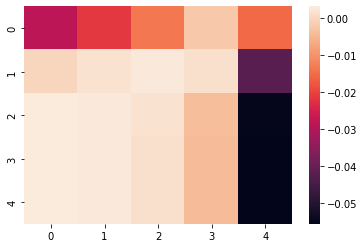

In [ ]:
np.random.seed(42)
r2_scores = []
for i in [1,2,5,8,10]:
  epsilon_perf = []
  for j in [0.01, 0.05, 0.1, 0.2, 0.5]:
    svm_regr = make_pipeline(StandardScaler(),SVR(C=i, epsilon=j, gamma=1))
    svm_regr.fit(normed_train_data, train_labels)
    scores = cross_val_score(svm_regr, data, labels, cv=4)
    epsilon_perf.append(np.mean(scores))
  r2_scores.append(epsilon_perf)
arr = np.array(r2_scores)
ax = sns.heatmap(arr)

In [ ]:
svm_regr = make_pipeline(StandardScaler(),SVR(C=2, epsilon=0.05))

In [ ]:
svm_regr.fit(normed_train_data, train_labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=2, epsilon=0.05))])

### Performance

In [ ]:
scores = cross_val_score(svm_regr, data, labels, cv=4, scoring='neg_mean_absolute_error')
np.mean(scores)

-0.4096179489450134

R^2 Score

In [ ]:
svm_regr.score(normed_test_data, test_labels)

0.5356846558744361

Histogram of the error

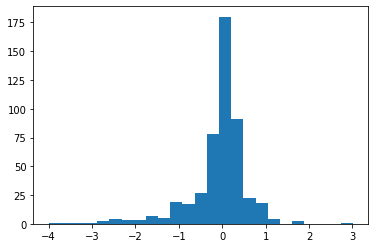

In [ ]:
y_pred = svm_regr.predict(normed_test_data)
y_test_arr = test_labels
plt.hist(y_pred - y_test_arr, bins=25)
plt.show()

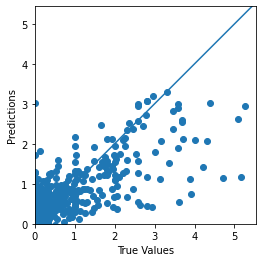

In [ ]:
plt.scatter(y_test_arr, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Random Forest Regression

### Model fitting

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
X = combined_data_jacob_cleaned.drop(['log2'], axis=1)
y = combined_data_jacob_cleaned['log2']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_regr = RandomForestRegressor(max_depth=20, max_leaf_nodes=100, random_state=0)

In [ ]:
X

,index,publisher,developer,vg_score,critic_score,user_score,category,status,age_ratings,collection,rating,rating_count,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,year,month,day,genres 24,genres 2,genres 25,genres 12,genres 7,genres 31,genres 8,genres 9,genres 16,genres 14,genres 10,genres 13,genres 36,genres 30,genres 11,genres 34,genres 15,genres 4,genres 33,genres 5,genres 35,genres 26,genres 32,platforms 44,platforms 24,platforms 35,platforms 29,platforms 93,platforms 64,platforms 130,platforms 25,platforms 163,platforms 72,platforms 12,platforms 48,platforms 52,platforms 19,platforms 20,platforms 18,platforms 170,platforms 386,platforms 7,platforms 86,platforms 167,platforms 165,platforms 8,platforms 39,platforms 58,platforms 159,platforms 113,platforms 9,platforms 73,platforms 240,platforms 14,platforms 16,platforms 161,platforms 46,platforms 38,platforms 55,platforms 42,platforms 74,platforms 169,platforms 13,platforms 132,platforms 23,platforms 41,platforms 82,platforms 11,platforms 34,platforms 15,platforms 21,platforms 6,platforms 63,platforms 385,platforms 121,platforms 384,platforms 3,platforms 94,platforms 137,platforms 37,platforms 5,platforms 49,platforms 26,platforms 32,game_modes,game_modes 2,game_modes 1,game_modes 3,game_modes 4,game_modes 6,game_modes 5,player_perspectives,player_perspectives 2,player_perspectives 7,player_perspectives 1,player_perspectives 3,player_perspectives 4,player_perspectives 6,player_perspectives 5,themes,themes 28,themes 44,themes 27,themes 19,themes 18,themes 20,themes 31,themes 39,themes 38,themes 42,themes 23,themes 41,themes 34,themes 1,themes 21,themes 32,themes 22,themes 17,themes 33,themes 43,themes 35,themes 40
0,1781,1151,829,8.1,8.2,0.0,0,0.0,9,1113.0,86.193063,55.0,83.096531,57.0,0.0,0,80.0,2.0,2007,1,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1782,740,740,0.0,9.2,0.0,2,0.0,10,27.0,91.501369,215.0,83.250685,219.0,0.0,0,75.0,4.0,2007,1,16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1783,977,977,0.0,0.0,0.0,0,0.0,-1,0.0,0.000000,0.0,0.000000,0.0,0.0,1,0.0,0.0,2007,1,18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1784,1151,331,0.0,8.0,6.9,0,0.0,10,5345.0,83.467144,49.0,81.733572,51.0,0.0,1,80.0,2.0,2007,1,22,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [ ]:
rf_regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_leaf_nodes=100, random_state=0)

### Performance

R^2 score using built-in method

In [ ]:
rf_regr.score(X_test, y_test)

0.5844812268110512

K-fold cross-validation

In [ ]:
scores = cross_val_score(rf_regr, X, y, cv=4, scoring='neg_mean_absolute_error')
np.mean(scores)

-0.4348087029347104

In [ ]:
2**-np.mean(scores)

1.3600107026129753

In [ ]:
y_pred = rf_regr.predict(X_test)
y_test_arr = np.array(y_test)

Histogram of the error

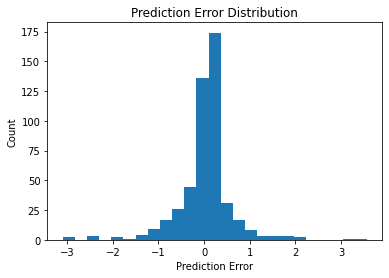

In [ ]:
plt.hist(y_pred - y_test_arr, bins=25)
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()


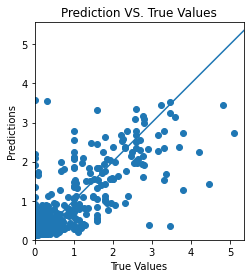

In [ ]:
plt.scatter(y_test_arr, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.title("Prediction VS. True Values")
_ = plt.plot([-100, 100], [-100, 100])


## Neural Network

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.8.0


In [ ]:
import pylab 
import scipy.stats as stats


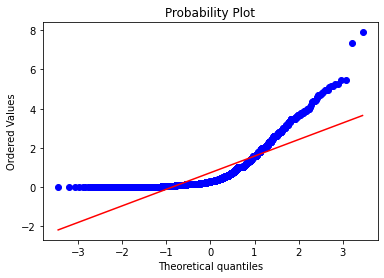

In [ ]:
stats.probplot(combined_data_jacob_cleaned['log2'], dist="norm", plot=pylab)
pylab.show()

In [ ]:
train_dataset = combined_data_jacob_cleaned.sample(frac=0.8,random_state=0)
test_dataset = combined_data_jacob_cleaned.drop(train_dataset.index)

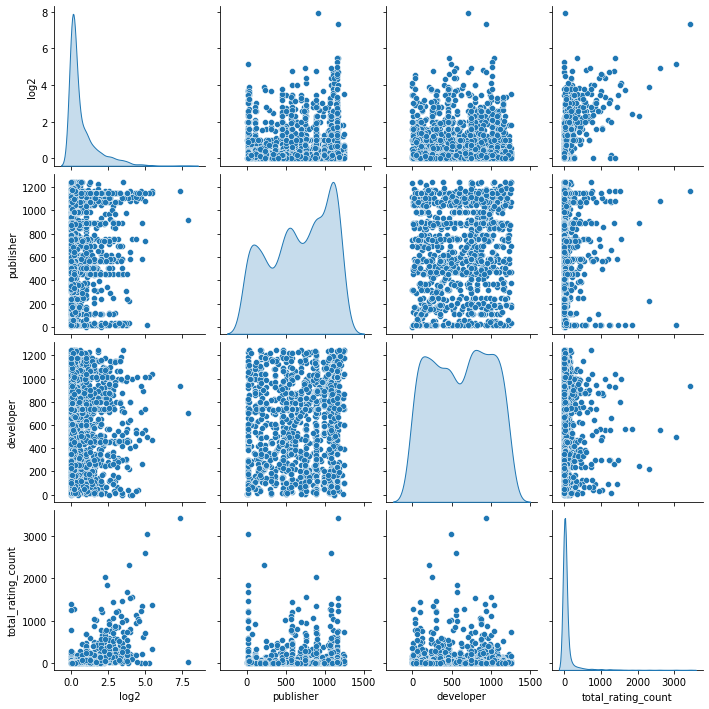

In [ ]:
sns.pairplot(train_dataset[["log2", "publisher", "developer", "total_rating_count"]], diag_kind="kde")

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("log2")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
index,1946.0,2988.658273,708.852992,1782.0,2368.25,2979.0,3598.75,4213.0
publisher,1946.0,671.776465,383.821477,2.0,360.00,737.0,1046.00,1249.0
developer,1946.0,612.331449,368.728802,0.0,274.25,621.0,925.00,1251.0
vg_score,1946.0,0.431860,1.796223,0.0,0.00,0.0,0.00,9.6
critic_score,1946.0,1.727852,3.173795,0.0,0.00,0.0,0.00,9.9
...,...,...,...,...,...,...,...,...
themes 17,1946.0,0.221994,0.415694,0.0,0.00,0.0,0.00,1.0
themes 33,1946.0,0.062179,0.241542,0.0,0.00,0.0,0.00,1.0
themes 43,1946.0,0.021069,0.143651,0.0,0.00,0.0,0.00,1.0
themes 35,1946.0,0.027749,0.164296,0.0,0.00,0.0,0.00,1.0


In [ ]:
train_labels = train_dataset.pop('log2')
test_labels = test_dataset.pop('log2')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
train_dataset.keys()

Index(['index', 'publisher', 'developer', 'vg_score', 'critic_score',
       'user_score', 'category', 'status', 'age_ratings', 'collection',
       ...
       'themes 34', 'themes 1', 'themes 21', 'themes 32', 'themes 22',
       'themes 17', 'themes 33', 'themes 43', 'themes 35', 'themes 40'],
      dtype='object', length=143)

In [ ]:
normed_train_data

,index,publisher,developer,vg_score,critic_score,user_score,category,status,age_ratings,collection,rating,rating_count,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,year,month,day,genres 24,genres 2,genres 25,genres 12,genres 7,genres 31,genres 8,genres 9,genres 16,genres 14,genres 10,genres 13,genres 36,genres 30,genres 11,genres 34,genres 15,genres 4,genres 33,genres 5,genres 35,genres 26,genres 32,platforms 44,platforms 24,platforms 35,platforms 29,platforms 93,platforms 64,platforms 130,platforms 25,platforms 163,platforms 72,platforms 12,platforms 48,platforms 52,platforms 19,platforms 20,platforms 18,platforms 170,platforms 386,platforms 7,platforms 86,platforms 167,platforms 165,platforms 8,platforms 39,platforms 58,platforms 159,platforms 113,platforms 9,platforms 73,platforms 240,platforms 14,platforms 16,platforms 161,platforms 46,platforms 38,platforms 55,platforms 42,platforms 74,platforms 169,platforms 13,platforms 132,platforms 23,platforms 41,platforms 82,platforms 11,platforms 34,platforms 15,platforms 21,platforms 6,platforms 63,platforms 385,platforms 121,platforms 384,platforms 3,platforms 94,platforms 137,platforms 37,platforms 5,platforms 49,platforms 26,platforms 32,game_modes,game_modes 2,game_modes 1,game_modes 3,game_modes 4,game_modes 6,game_modes 5,player_perspectives,player_perspectives 2,player_perspectives 7,player_perspectives 1,player_perspectives 3,player_perspectives 4,player_perspectives 6,player_perspectives 5,themes,themes 28,themes 44,themes 27,themes 19,themes 18,themes 20,themes 31,themes 39,themes 38,themes 42,themes 23,themes 41,themes 34,themes 1,themes 21,themes 32,themes 22,themes 17,themes 33,themes 43,themes 35,themes 40
672,-0.755669,0.565949,0.750331,-0.240427,-0.544412,-0.167538,-0.317698,-0.128229,0.671736,1.614963,0.983952,-0.274448,0.366304,-0.282493,-0.169562,-1.410044,0.057591,-0.451334,-0.802079,0.577068,-0.135524,-0.184361,-0.133316,-0.280488,1.688786,-0.218866,-0.795126,-0.337418,-0.345856,-0.19877,-0.327894,-0.213661,-0.478742,-0.022669,-0.022669,-0.19737,-0.230224,2.224528,-0.266383,-0.204290,-0.407287,-0.093853,-0.10442,-0.380305,-0.022669,-0.045373,-0.022669,-0.039284,-0.022669,-0.032067,-0.356012,-0.022669,-0.050741,-0.032067,-0.401267,-0.470617,-0.104420,-0.022669,2.168946,-0.022669,-0.137253,-0.032067,-0.022669,-0.022669,-0.152058,-0.071851,-0.235130,-0.252857,-0.032067,-0.039284,-0.039284,-0.436023,-0.050741,-0.022669,-0.385595,-0.032067,-0.022669,-0.303289,-0.233911,-0.081987,-0.022669,-0.064233,-0.150281,-0.032067,-0.032067,-0.022669,-0.201546,-0.039284,-0.032067,-0.207003,-0.032067,-0.032067,-0.808966,-0.022669,-0.045373,-0.022669,-0.032067,-0.295137,-0.022669,-0.032067,-0.297189,-0.398675,-0.368712,-0.039284,-0.022669,-0.355095,-0.742664,0.393467,-0.421752,-0.334578,-0.039284,-0.133316,1.621495,-0.714568,-0.122964,-0.396942,-0.465724,-0.413268,-0.064233,-0.232687,1.830777,-0.118586,-0.193117,-0.312289,-0.254004,-0.395207,-0.11405,-0.20429,-0.217574,-0.247057,-0.064233,-0.160677,-0.093853,-0.125098,-0.990538,-0.207003,-0.139183,-0.272958,-0.534032,-0.257424,-0.146667,-0.168898,-0.218866
2294,1.532535,-0.523099,-0.383294,-0.240427,-0.544412,-0.167538,-0.317698,-0.128229,0.671736,-0.190509,0.928316,-0.278900,0.813172,-0.260509,-0.112514,-1.410044,0.908457,0.589096,1.768061,-1.448395,-1.305059,-0.184361,-0.133316,-0.280488,1.688786,-0.218866,1.257016,-0.337418,-0.345856,-0.19877,-0.327894,-0.213661,-0.478742,-0.022669,-0.022669,-0.19737,-0.230224,-0.449303,-0.266383,-0.204290,-0.407287,-0.093853,-0.10442,-0.380305,-0.022669,-0.045373,-0.022669,-0.039284,-0.022669,-0.032067,-0.356012,-0.022669,-0.050741,-0.032067,-0.401267,-0.470617,-0.104420,-0.022669,-0.460817,-0.022669,-0.137253,-0.032067,-0.022669,-0.022669,-0.152058,-0.071851,-0.235130,-0.252857,-0.032067,-0.039284,-0.039284,-0.436023,-0.050741,-0.022669,-0.385595,-0.032067,-0.022669,-0.303289,-0.233911,-0.081987,-0.022669,-0.064233,-0.150281,-0.032067,-0.032067,-

### Model fitting

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(1)
  ])


  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),metrics=['mae', 'mse'])
  return model

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

### Performance

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)



...................

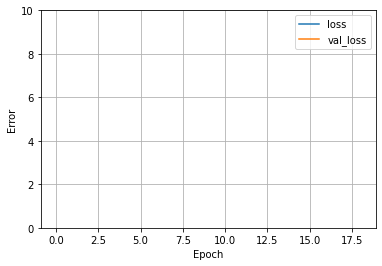

In [ ]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_loss(history)

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

16/16 - 0s - loss: 1301.1058 - mae: 0.6423 - mse: 1.2249 - 184ms/epoch - 12ms/step
Testing set Mean Abs Error:  0.64


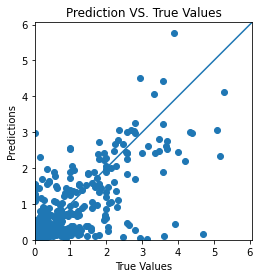

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.title("Prediction VS. True Values")
_ = plt.plot([-100, 100], [-100, 100])


[]

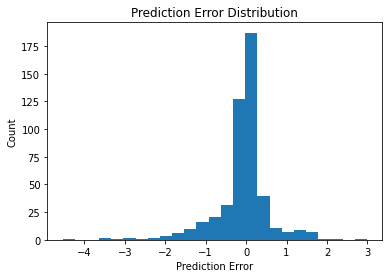

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Prediction Error Distribution")
plt.plot()

# Others

In [ ]:
import xgboost as xgb


In [ ]:
dtrain = xgb.DMatrix(train_dataset, label=train_labels)
dtest = xgb.DMatrix(test_dataset, label=test_labels)

In [ ]:
param = {'max_depth': 5, 'max_leaves': 10, 'alpha': 5}
param['nthread'] = 4
param['eval_metric'] = 'mae'

In [ ]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [ ]:
num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10)

[0]	eval-mae:0.571544	train-mae:0.537435
Multiple eval metrics have been passed: 'train-mae' will be used for early stopping.

Will train until train-mae hasn't improved in 10 rounds.
[1]	eval-mae:0.50952	train-mae:0.462017
[2]	eval-mae:0.469338	train-mae:0.411951
[3]	eval-mae:0.442096	train-mae:0.380186
[4]	eval-mae:0.421879	train-mae:0.356727
[5]	eval-mae:0.409872	train-mae:0.33901
[6]	eval-mae:0.404215	train-mae:0.32489
[7]	eval-mae:0.403777	train-mae:0.313219
[8]	eval-mae:0.402263	train-mae:0.303725
[9]	eval-mae:0.398209	train-mae:0.297666
[10]	eval-mae:0.391095	train-mae:0.290524
[11]	eval-mae:0.39078	train-mae:0.286573
[12]	eval-mae:0.389046	train-mae:0.279239
[13]	eval-mae:0.388733	train-mae:0.274628
[14]	eval-mae:0.388201	train-mae:0.26921
[15]	eval-mae:0.38696	train-mae:0.265665
[16]	eval-mae:0.384747	train-mae:0.260247
[17]	eval-mae:0.385386	train-mae:0.255824
[18]	eval-mae:0.38561	train-mae:0.253224
[19]	eval-mae:0.382862	train-mae:0.250397
[20]	eval-mae:0.38145	train-mae:0.

In [ ]:
ypred = bst.predict(dtest)

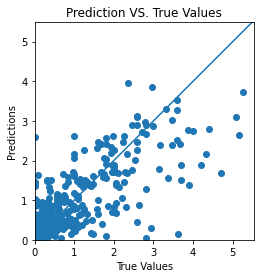

In [ ]:
plt.scatter(test_labels, ypred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.title("Prediction VS. True Values")
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

Y_pred_train = model.predict(X_train)

print('R^2: %.2f' % r2_score(y_train, Y_pred_train))

R^2: 0.06


In [ ]:
0.47 * 60

28.2

In [ ]:
np.mean(test_labels)

1.233878209794089

In [ ]:
test_stats = test_dataset.describe()
test_stats

,index,publisher,developer,vg_score,critic_score,user_score,total_sales_shipped,id,category,status,age_ratings,collection,rating,rating_count,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,log2,year,month,day,genres 13,genres 11,genres 34,genres 4,genres 5,genres 31,genres 26,genres 15,genres 16,genres 14,genres 9,genres 8,genres 25,genres 32,genres 30,genres 7,genres 35,genres 10,genres 36,genres 2,genres 24,genres 12,genres 33,platforms 13,platforms 55,platforms 130,platforms 11,platforms 52,platforms 161,platforms 34,platforms 384,platforms 86,platforms 167,platforms 121,platforms 38,platforms 5,platforms 26,platforms 73,platforms 137,platforms 64,platforms 15,platforms 16,platforms 18,platforms 163,platforms 63,platforms 37,platforms 132,platforms 14,platforms 9,platforms 19,platforms 386,platforms 49,platforms 23,platforms 8,platforms 21,platforms 58,platforms 42,platforms 82,platforms 74,platforms 94,platforms 72,platforms 170,platforms 25,platforms 32,platforms 3,platforms 7,platforms 35,platforms 240,platforms 39,platforms 385,platforms 6,platforms 29,platforms 169,platforms 46,platforms 93,platforms 41,platforms 24,platforms 12,platforms 113,platforms 20,platforms 165,platforms 159,platforms 48,platforms 44,game_modes,game_modes 5,game_modes 6,game_modes 2,game_modes 4,game_modes 3,game_modes 1,player_perspectives,player_perspectives 5,player_perspectives 6,player_perspectives 2,player_perspectives 7,player_perspectives 4,player_perspectives 3,player_perspectives 1,themes,themes 43,themes 34,themes 1,themes 38,themes 31,themes 40,themes 18,themes 19,themes 23,themes 28,themes 21,themes 27,themes 42,themes 22,themes 32,themes 35,themes 39,themes 41,themes 33,themes 17,themes 20,themes 44
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.0,487.000000,487.000000,487.000000,487.0,487.000000,487.000000,487.000000,487.000000,487.000000,487.0,487.000000,487.000000,487.000000,487.0,487.000000,487.0,487.0,487.000000,487.0,487.000000,487.000000,487.0,487.000000,487.0,487.0,487.0,487.0,487.0,487.000000,487.0,487.000000,487.0,487.000000,487.000000,487.0,487.0,487.000000,487.0,487.000000,487.0,487.0,487.000000,487.000000,487.000000,487.0,487.0,487.000000,487.0,487.0,487.000000,487.000000,487.0,487.000000,487.000000,487.000000,487.000000,487.0,487.000000,487.000000,487.0,487.000000,487.000000,487.000000,487.0,487.000000,487.000000,487.0,487.000000,487.0,487.000000,487.000000,487.0,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,3030.332649,535.652977,567.112936,0.358932,1.777413,0.228131,1.495072,27654.679671,0.628337,0.121150,6.663244,1119.878850,50.333118,61.108830,55.700447,65.837782,4.326489,0.663244,46.913134,4.728953,0.757277,2012.264887,6.926078,16.476386,0.205339,0.043121,0.069815,0.071869,0.125257,0.342916,0.006160,0.170431,0.026694,0.108830,0.108830,0.088296,0.057495,0.164271,0.0,0.059548,0.010267,0.039014,0.0,0.016427,0.028747,0.262834,0.057495,0.002053,0.0,0.125257,0.002053,0.016427,0.0,0.018480,0.0,0.0,0.022587,0.0,0.045175,0.154004,0.0,0.002053,0.0,0.0,0.0,0.0,0.0,0.004107,0.0,0.073922,0.0,0.121150,0.149897,0.0,0.0,0.110883,0.0,0.030801,0.0,0.0,0.002053,0.004107,0.004107,0.0,0.0,0.026694,0.0,0.0,0.086242,0.002053,0.0,0.002053,0.039014,0.002053,0.412731,0.0,0.016427,0.0